### Homeless Not Hopeless ###

- Data Source:
  - Housing Availability and Affordability:
    - Monthly Rent Data/Runting in Burdern/Median Income: https://data.cccnewyork.org/

    - Children in Shelter: https://data.cccnewyork.org/data

- Project Description: In this project, homelessness_study, We used data from different sources to check why homelessness is getting worse within NYC. There are many facts that are impacting the homelessness phenomena such as:
    - The increasing price of renting
    - Housing is STILL not affordable
    - Median Income of Renters: $34,255
    - Average 2- Bedroom Rent: $1,651
    - Income to afford that rent: $59,430
    - Other facts


## Libraries

In [2]:
import pandas as pd
import numpy as np
# Visualizing time series data
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11, 4)})
import matplotlib.dates as mdates

%matplotlib inline 
import scipy.stats as stats
import re

## An Overview of Monthly Rent Data
- What are the minimum and maximum people can afford to pay for rent

In [ ]:
#If you want to upload the files into your google colab use this code: 
# from google.colab import files
# uploaded=files.upload()
# Median Monthly Rent
# path1='/content/Median Monthly Rent.csv'
# #Creating dataframe
# df=pd.read_csv(path1, skiprows=5)
# df.head(5)

Saving Median Monthly Rent.csv to Median Monthly Rent.csv


In [ ]:
!curl https://raw.githubusercontent.com/MBouchaqour/homelessness_project/main/data/rent/Median%20Monthly%20Rent.csv -o monthly_rent.csv


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 41284  100 41284    0     0   403k      0 --:--:-- --:--:-- --:--:--  403k


In [ ]:
df=pd.read_csv("monthly_rent.csv")
df.head(5)

,Location,TimeFrame,DataFormat,Data,Fips
0,Battery Park/Tribeca,2005,Dollars,2230.91670,101
1,Greenwich Village,2005,Dollars,2230.91670,102
2,Lower East Side,2005,Dollars,832.00070,103
3,Chelsea/Clinton,2005,Dollars,1813.60404,104
4,Midtown Business District,2005,Dollars,1813.60404,105


In [ ]:
#The period of data
start_date=df['TimeFrame'].min()
end_date=df['TimeFrame'].max()
print(f'Data is ranged between {start_date} and {end_date}')

Data is ranged between 2005 and 2019


In [ ]:
#filtring locations
target_location=['Manhattan','Queens','Staten Island','Bronx','Brooklyn']
filter_by_location=df['Location'].isin(target_location)
df=df[filter_by_location]
df.head(5)

,Location,TimeFrame,DataFormat,Data,Fips
59,Bronx,2005,Dollars,908.11433,36005
60,Brooklyn,2005,Dollars,1034.09550,36047
61,Manhattan,2005,Dollars,1245.37644,36061
62,Queens,2005,Dollars,1236.19031,36081
63,Staten Island,2005,Dollars,1133.83060,36085


In [ ]:
data_info=[('Null values check: ', df.isnull().sum().sort_values(ascending=False)),
           ('Duplicate data: ', df.duplicated().sum()), 
           ('Type: ' , df.dtypes) ]
for item in data_info:
  print(item[0], end='\t')
  print(item[1])

Null values check: 	Fips          0
Data          0
DataFormat    0
TimeFrame     0
Location      0
dtype: int64
Duplicate data: 	0
Type: 	Location       object
TimeFrame       int64
DataFormat     object
Data          float64
Fips            int64
dtype: object


In [ ]:
pivot = df.pivot_table(
    index=['Location'], 
    values=['Data'], 
    aggfunc='mean')
pivot

,Data
Location,
Bronx,1025.550313
Brooklyn,1190.809277
Manhattan,1498.786221
Queens,1362.014676
Staten Island,1142.549607


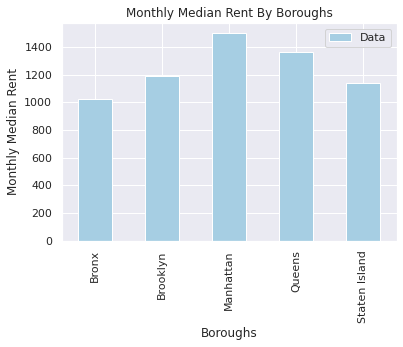

In [ ]:
# colours = ["green", "red", "purple", "blue", "orange" ]
pivot.plot(kind='bar', colormap='Paired')
plt.title("Monthly Median Rent By Boroughs")
plt.xlabel("Boroughs")
plt.ylabel("Monthly Median Rent")
plt.show()

* The graph above shows that Manhattan is the leading borough when it comes to higher renting price, while Bronx, is still considered the lower renting price.

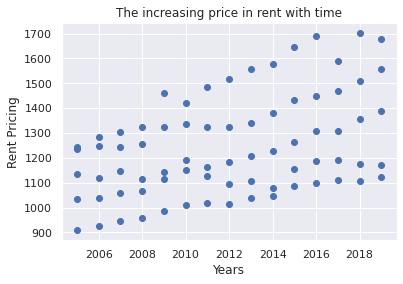

In [ ]:
plt.scatter(df['TimeFrame'],df['Data'])

plt.title("The increasing price in rent with time")
plt.xlabel('Years')
plt.ylabel('Rent Pricing')
plt.show()

* According to data, we may infer that the renting price is getting higher year after year and that may increase the homelesseness

## Renting in Burden: How much percentage people in low income are paying for rent.

In [ ]:
#Working locally from google colab us this code
# from google.colab import files
# uploaded=files.upload()
# # Renting in Burden
# path1='/content/Severe Rent Burden.csv'
# #Creating dataframe
# df_2=pd.read_csv(path1, skiprows=5)
# df_2.head(5)

Saving Severe Rent Burden.csv to Severe Rent Burden.csv


In [ ]:
!curl https://raw.githubusercontent.com/MBouchaqour/homelessness_project/main/data/rent/Severe%20Rent%20Burden.csv -o severe_rent_burden.csv


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 38939  100 38939    0     0  2112k      0 --:--:-- --:--:-- --:--:-- 2112k


In [ ]:
df_2=pd.read_csv("severe_rent_burden.csv")
df_2.head(5)

,Location,TimeFrame,DataFormat,Data,Fips
0,New York City,2005,Percent,0.26663,3651000
1,New York City,2006,Percent,0.26722,3651000
2,New York City,2007,Percent,0.25429,3651000
3,New York City,2008,Percent,0.25726,3651000
4,New York City,2009,Percent,0.26284,3651000


In [ ]:
#filtring locations
target_location=['Manhattan','Queens','Staten Island','Bronx','Brooklyn']
filter_by_location=df_2['Location'].isin(target_location)
df_2=df_2[filter_by_location]
df_2.head(5)

,Location,TimeFrame,DataFormat,Data,Fips
13,Manhattan,2017,Percent,0.20596,36061
14,Manhattan,2016,Percent,0.22133,36061
15,Manhattan,2015,Percent,0.21786,36061
16,Manhattan,2014,Percent,0.20846,36061
17,Manhattan,2013,Percent,0.23989,36061


In [ ]:
data_info=[('Null values check: ', df_2.isnull().sum().sort_values(ascending=False)),
           ('Duplicate data: ', df_2.duplicated().sum()), 
           ('Type: ' , df_2.dtypes) ]
for item in data_info:
  print(item[0], end='\t')
  print(item[1])

Null values check: 	Fips          0
Data          0
DataFormat    0
TimeFrame     0
Location      0
dtype: int64
Duplicate data: 	0
Type: 	Location       object
TimeFrame       int64
DataFormat     object
Data          float64
Fips            int64
dtype: object


In [ ]:
dt={
    'Location':df_2['Location'],
    'AverageIncome%':(df_2['Data']).round(2)
}
data_frame=pd.DataFrame.from_dict(dt)
pivot = data_frame.pivot_table(
    index=['Location'], 
    values=['AverageIncome%'], 
    aggfunc='mean')
pivot


,AverageIncome%
Location,
Bronx,0.323333
Brooklyn,0.283333
Manhattan,0.217333
Queens,0.278667
Staten Island,0.285333


In [ ]:
#This code is for comparing the income with how much spending on rent our data is table_income
table_per_income=pivot.reset_index()
table_per_income.style.format({'AverageIncome%': "{:.2%}"})

,Location,AverageIncome%
0,Bronx,32.33%
1,Brooklyn,28.33%
2,Manhattan,21.73%
3,Queens,27.87%
4,Staten Island,28.53%


* Hosehold who lives In boroughs except Manhattan are paying almsot 28% from their income to rent. An example of this will be as the followin: 
If an individual has income of $25,000 a year, and lives in Brookly, they will be paying at least $7000 just for rent, the remaining will be $18,000. However, most of people who are more likely homeless, their income is either 0 or less than $1000 a year. The next data will further investigate this point. 

# Median Income data

In [ ]:
#using googl colab use this code:
# from google.colab import files
# uploaded=files.upload()
# # Median Income
# path1='/content/Median Incomes.csv'
# #Creating dataframe
# df_3=pd.read_csv(path1, skiprows=5)
# df_3.head(5)

Saving Median Incomes.csv to Median Incomes.csv


In [ ]:
!curl https://raw.githubusercontent.com/MBouchaqour/homelessness_project/main/data/income/Median%20Incomes.csv -o median_income.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  367k  100  367k    0     0  2960k      0 --:--:-- --:--:-- --:--:-- 2960k


In [ ]:
df_3=pd.read_csv("median_income.csv")
df_3.head(5)

,Location,Household Type,TimeFrame,DataFormat,Data,Fips
0,Astoria,Families without Children,2019,Dollars,92755,401
1,Astoria,Families with Children,2019,Dollars,75972,401
2,Astoria,Families,2019,Dollars,88662,401
3,Astoria,All Households,2019,Dollars,79180,401
4,Astoria,Families without Children,2018,Dollars,79374.50784,401


In [ ]:
#filtring locations
target_location=['Manhattan','Queens','Staten Island','Bronx','Brooklyn']
filter_by_location=df_3['Location'].isin(target_location)
df_3=df_3[filter_by_location]
df_3.tail(5)

,Location,Household Type,TimeFrame,DataFormat,Data,Fips
3115,Staten Island,Families with Children,2006,Dollars,98525.5503,36085
3116,Staten Island,Families without Children,2005,Dollars,93105.33984,36085
3117,Staten Island,Families with Children,2005,Dollars,94044.94946,36085
3118,Staten Island,Families,2005,Dollars,93644.69676,36085
3119,Staten Island,All Households,2005,Dollars,82705.33113,36085


In [ ]:
print('Null values: ', df_3.isnull().sum().sort_values(ascending=False))
print()
print("Duplicate: ", df_3.duplicated().sum())
print()
print('Data type: ', df_3.dtypes)

Null values:  Fips              0
Data              0
DataFormat        0
TimeFrame         0
Household Type    0
Location          0
dtype: int64

Duplicate:  0

Data type:  Location          object
Household Type    object
TimeFrame          int64
DataFormat        object
Data              object
Fips               int64
dtype: object


In [ ]:
df_3['Data'] = df_3['Data'] .astype(float)
print('Data type: ', df_3.dtypes)

Data type:  Location           object
Household Type     object
TimeFrame           int64
DataFormat         object
Data              float64
Fips                int64
dtype: object


In [ ]:
pivot = df_3.pivot_table(
    index=['Location'], 
    columns=['Household Type'],
    values=['Data'], 
    aggfunc='median')
pivot

Data  ...                          
Household Type All Households  ... Families without Children
Location                       ...                          
Bronx             39002.68837  ...               54712.39659
Brooklyn          51633.94562  ...               64680.60293
Manhattan         81553.41788  ...               96348.82336
Queens            65201.72829  ...               78082.73345
Staten Island     82601.59695  ...               99273.13690

[5 rows x 4 columns]

In [ ]:
#This code is for comparing the income with how much spending on rent our data is table_income
table_income=pivot.reset_index()
Picked_cols=[('Location',                          ''),(    'Data',    'Families with Children')]
table_income=table_income[Picked_cols]
new_cols=['Location','Families_With_Children']
table_income.columns=new_cols
table_income

,Location,Families_With_Children
0,Bronx,36887.61357
1,Brooklyn,51379.15766
2,Manhattan,97165.92003
3,Queens,66390.57124
4,Staten Island,94760.14820


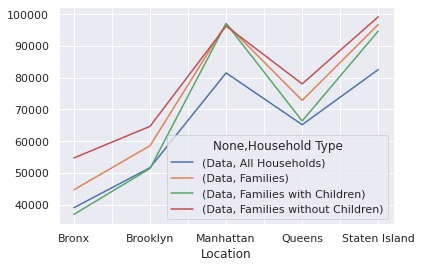

In [ ]:
pivot.plot()
plt.show()

* We should consider that the lower income occurs in Bronx, with Families with Children in roughly $37,000. In the next dataset we will investigate children in the shelter.

In [ ]:
# Investigating income based on year
def get_location(loc, data=df_3):
  cond=df_3['Location']==loc
  gp=df_3[cond]
  return gp

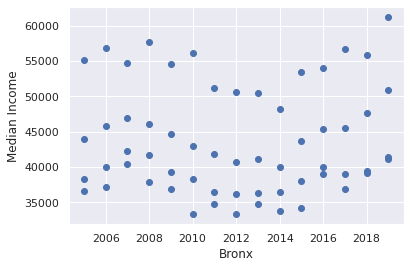

In [ ]:
#choose the location
data=get_location('Bronx')

#See the pattern
plt.scatter(data['TimeFrame'],data['Data'])
plt.xlabel('Bronx')
plt.ylabel('Median Income')
plt.show()

* Some more investigation regarding the income and how much goes for rent

In [ ]:
#Mergin the two dataframes table_income and table_per_income
merged_income_percentage = pd.merge(table_income, table_per_income)
merged_income_percentage['How much goes for rent']=merged_income_percentage['Families_With_Children'] * merged_income_percentage['AverageIncome%']
merged_income_percentage

,Location,Families_With_Children,AverageIncome%,How much goes for rent
0,Bronx,36887.61357,0.323333,11926.995054
1,Brooklyn,51379.15766,0.283333,14557.428004
2,Manhattan,97165.92003,0.217333,21117.393287
3,Queens,66390.57124,0.278667,18500.839186
4,Staten Island,94760.14820,0.285333,27038.228953


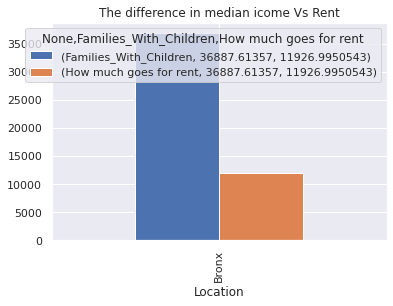

In [ ]:
cond=merged_income_percentage['Location']=='Bronx'
data=merged_income_percentage[cond]
# barWidth = 0.25
# fig = plt.subplots(figsize =(12, 8))
data.pivot(index='Location', columns=['Families_With_Children','How much goes for rent'], values=['Families_With_Children','How much goes for rent']).plot(kind='bar')
plt.title('The difference in median icome Vs Rent')
plt.show()

## Children in Shelter

In [3]:
DHS_Daily_Report = pd.read_csv('https://raw.githubusercontent.com/MBouchaqour/homelessness_project/main/data/DHS_Daily_Report_cleaned.csv')
DHS_Daily_Report.head(5)

,Date of Census,Total Adults in Shelter,Total Children in Shelter,Total Individuals in Shelter,Single Adult Men in Shelter,Single Adult Women in Shelter,Total Single Adults in Shelter,Families with Children in Shelter,Adults in Families with Children in Shelter,Children in Families with Children in Shelter,Total Individuals in Families with Children in Shelter,Adult Families in Shelter,Individuals in Adult Families in Shelter
0,9/28/2021,30803.0,14741.0,45544.0,12312.0,4080.0,16392.0,8478.0,11126.0,14741.0,25867.0,1569,3285.0
1,9/27/2021,30827.0,14789.0,45616.0,12272.0,4076.0,16348.0,8495.0,11161.0,14789.0,25950.0,1585,3318.0
2,9/26/2021,30764.0,14750.0,45514.0,12261.0,4079.0,16340.0,8471.0,11125.0,14750.0,25875.0,1575,3299.0
3,9/25/2021,30683.0,14760.0,45443.0,12180.0,4082.0,16262.0,8466.0,11125.0,14760.0,25885.0,1573,3296.0
4,9/24/2021,30599.0,14721.0,45320.0,12161.0,4073.0,16234.0,8436.0,11082.0,14721.0,25803.0,1568,3283.0


In [4]:
print("data shape: ", DHS_Daily_Report.shape)
print("Date type: ", DHS_Daily_Report.dtypes)

data shape:  (2998, 13)
Date type:  Date of Census                                              object
Total Adults in Shelter                                    float64
Total Children in Shelter                                  float64
Total Individuals in Shelter                               float64
Single Adult Men in Shelter                                float64
Single Adult Women in Shelter                              float64
Total Single Adults in Shelter                             float64
Families with Children in Shelter                          float64
Adults in Families with Children in Shelter                float64
Children in Families with Children in Shelter              float64
Total Individuals in Families with Children in Shelter     float64
Adult Families in Shelter                                    int64
Individuals in Adult Families in Shelter                   float64
dtype: object


In [5]:
#changing the date from object to date
DHS_Daily_Report['Date of Census']=pd.to_datetime(DHS_Daily_Report['Date of Census'])
DHS_Daily_Report.dtypes

Date of Census                                             datetime64[ns]
Total Adults in Shelter                                           float64
Total Children in Shelter                                         float64
Total Individuals in Shelter                                      float64
Single Adult Men in Shelter                                       float64
Single Adult Women in Shelter                                     float64
Total Single Adults in Shelter                                    float64
Families with Children in Shelter                                 float64
Adults in Families with Children in Shelter                       float64
Children in Families with Children in Shelter                     float64
Total Individuals in Families with Children in Shelter            float64
Adult Families in Shelter                                           int64
Individuals in Adult Families in Shelter                          float64
dtype: object

In [6]:
DHS_Daily_Report.isnull().sum() # checking for missing data

Date of Census                                             0
Total Adults in Shelter                                    0
Total Children in Shelter                                  0
Total Individuals in Shelter                               0
Single Adult Men in Shelter                                0
Single Adult Women in Shelter                              0
Total Single Adults in Shelter                             0
Families with Children in Shelter                          0
Adults in Families with Children in Shelter                0
Children in Families with Children in Shelter              0
Total Individuals in Families with Children in Shelter     0
Adult Families in Shelter                                  0
Individuals in Adult Families in Shelter                   0
dtype: int64

In [7]:
# Cheking for duplicate data
n_dupes=DHS_Daily_Report.duplicated().sum()
print("Number of duplicate rows are %i." % n_dupes)

Number of duplicate rows are 1.


In [8]:
#check this one
dupplicate=DHS_Daily_Report[DHS_Daily_Report.duplicated()]
dupplicate

,Date of Census,Total Adults in Shelter,Total Children in Shelter,Total Individuals in Shelter,Single Adult Men in Shelter,Single Adult Women in Shelter,Total Single Adults in Shelter,Families with Children in Shelter,Adults in Families with Children in Shelter,Children in Families with Children in Shelter,Total Individuals in Families with Children in Shelter,Adult Families in Shelter,Individuals in Adult Families in Shelter
2918,2021-10-21,31102.0,14937.0,46039.0,12365.0,4148.0,16513.0,8611.0,11285.0,14937.0,26222.0,1577,3304.0


In [9]:
cond=DHS_Daily_Report['Date of Census']=="2021-10-21"
DHS_Daily_Report[cond]

,Date of Census,Total Adults in Shelter,Total Children in Shelter,Total Individuals in Shelter,Single Adult Men in Shelter,Single Adult Women in Shelter,Total Single Adults in Shelter,Families with Children in Shelter,Adults in Families with Children in Shelter,Children in Families with Children in Shelter,Total Individuals in Families with Children in Shelter,Adult Families in Shelter,Individuals in Adult Families in Shelter
2917,2021-10-21,31102.0,14937.0,46039.0,12365.0,4148.0,16513.0,8611.0,11285.0,14937.0,26222.0,1577,3304.0
2918,2021-10-21,31102.0,14937.0,46039.0,12365.0,4148.0,16513.0,8611.0,11285.0,14937.0,26222.0,1577,3304.0


In [10]:
DHS_Daily_Report.drop_duplicates(inplace=True)
n_dupes=DHS_Daily_Report.duplicated().sum()
print("Number of duplicate rows are %i." % n_dupes)


Number of duplicate rows are 0.


In [11]:
# We should find only one line
cond=DHS_Daily_Report['Date of Census']=="2021-10-21"
DHS_Daily_Report[cond]

,Date of Census,Total Adults in Shelter,Total Children in Shelter,Total Individuals in Shelter,Single Adult Men in Shelter,Single Adult Women in Shelter,Total Single Adults in Shelter,Families with Children in Shelter,Adults in Families with Children in Shelter,Children in Families with Children in Shelter,Total Individuals in Families with Children in Shelter,Adult Families in Shelter,Individuals in Adult Families in Shelter
2917,2021-10-21,31102.0,14937.0,46039.0,12365.0,4148.0,16513.0,8611.0,11285.0,14937.0,26222.0,1577,3304.0


In [12]:
#getting the date period
star_date=min(DHS_Daily_Report['Date of Census'])
end_date=max(DHS_Daily_Report['Date of Census'])
print(f"The period we deal with is started from {star_date.date()} and end at {end_date.date()}")

The period we deal with is started from 2013-08-21 and end at 2021-11-03


In [13]:
#indexing the data by date and creating 3 columns
DHS_Daily_Report=DHS_Daily_Report.set_index('Date of Census')
DHS_Daily_Report['Year'] = DHS_Daily_Report.index.year
DHS_Daily_Report['Month'] = DHS_Daily_Report.index.month_name()
DHS_Daily_Report['Weekday_Name'] = DHS_Daily_Report.index.day_name()

In [14]:
  #Target variables
Childrens=['Total Children in Shelter','Families with Children in Shelter']
Adults=['Total Adults in Shelter','Single Adult Men in Shelter']
Individuals=['Total Individuals in Shelter','Individuals in Adult Families in Shelter']

In [15]:
def slicing_Data(group, period, data=DHS_Daily_Report):
  try:
  #collecting the target group
    Childrens=['Total Children in Shelter','Families with Children in Shelter']
    Adults=['Total Adults in Shelter','Single Adult Men in Shelter']
    Individuals=['Total Individuals in Shelter','Individuals in Adult Families in Shelter']
    if group=='Childrens':
      group=Childrens[:]
    elif group=='Adults':
      group=Adults[:]
    elif group=='Individuals':
      group=Individuals[:]
    else:
      return 'Type does not exist'
    if period not in ["Year", "Month", "Weekday_Name"]:
      return 'You picked a wrong Period'
    group.append(period)
    df_table=data[group]
    return df_table
  except:
    print('An error occurs while we respond to your request')

In [16]:
#slcing data by Year, Month, Weekday_Name /// Childrens/ Adults /// Individuals
table=slicing_Data("Childrens","Year")
table

,Total Children in Shelter,Families with Children in Shelter,Year
Date of Census,,,
2021-09-28,14741.0,8478.0,2021
2021-09-27,14789.0,8495.0,2021
2021-09-26,14750.0,8471.0,2021
2021-09-25,14760.0,8466.0,2021
2021-09-24,14721.0,8436.0,2021
...,...,...,...
2018-10-10,22375.0,12619.0,2018
2019-05-13,21606.5,12176.0,2019
2020-06-07,18967.0,10657.0,2020


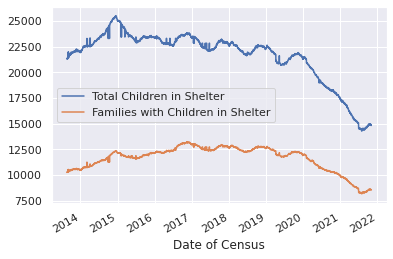

In [17]:
table.filter(
    items=['Total Children in Shelter','Families with Children in Shelter']
).plot()
plt.show()

* As we can see from the graph, there is a huge drop regarding the number of children in the Shelter. We can't really infer anything. It may be a good or bad sign to see that dropping occurs:
As a good interpretation: We may say that childrens are out of shelter and they moved to somewhere else or to houses where they will have normal life.
Bad interpretation: We can say that children moved to outddor/street and that occurs because of the bad situation in the shelter (probably not safe), they were encoraged by the weather (When it hot outside families/childrens step out of the shelter). 

In [18]:
# Activate this function after you create the table:
#This function return a pivot table
def pivote_table(group, period, data=table):
  Childrens=['Total Children in Shelter','Families with Children in Shelter']
  Adults=['Total Adults in Shelter','Single Adult Men in Shelter']
  Individuals=['Total Individuals in Shelter','Individuals in Adult Families in Shelter']
  if group=='Childrens':
    group=Childrens[:]
  elif group=='Adults':
    group=Adults[:]
  elif group=='Individuals':
    group=Individuals[:]
  else:
    return 'Type does not exist'
  pivot=table.pivot_table(index=period,values=group,aggfunc='sum', margins=True)
  return pivot

In [19]:
#making sure you pick the same period (Year/Month/Day) as the table above
pivot =pivote_table("Childrens","Year")
pivot


,Families with Children in Shelter,Total Children in Shelter
Year,,
2013,1397300.5,2910095.0
2014,4136235.0,8579676.5
2015,4337913.0,8628659.0
2016,4614610.0,8493048.0
2017,4632119.0,8299623.0
2018,4589189.0,8138639.0
2019,4441058.0,7848557.5
2020,3964584.0,7048925.0
2021,2742112.0,4777725.0


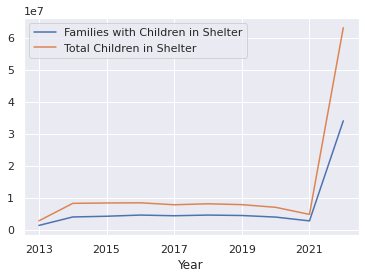

In [ ]:
#graphing the pivot table
pivot.plot()
plt.show()

* This graph tells us that the number of children that enters to shelter increased in 2021. We will investigate this case further. 

In [20]:
#Intro to Time series
#Checking the differences between entries children for each day/date

new_table=table.iloc[:,0:2]
new_table.columns=['Total', 'T_familes']
new_table['Difference']=new_table.eval('Total - T_familes')
new_table

,Total,T_familes,Difference
Date of Census,,,
2021-09-28,14741.0,8478.0,6263.0
2021-09-27,14789.0,8495.0,6294.0
2021-09-26,14750.0,8471.0,6279.0
2021-09-25,14760.0,8466.0,6294.0
2021-09-24,14721.0,8436.0,6285.0
...,...,...,...
2018-10-10,22375.0,12619.0,9756.0
2019-05-13,21606.5,12176.0,9430.5
2020-06-07,18967.0,10657.0,8310.0


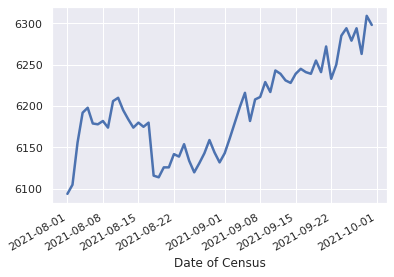

In [21]:
# date is ranged from 2013-08-21 and  2021-11-03
ax1 = new_table.loc['2021-8':'2021-9', 'Difference']
ax1.plot(linewidth=2.5)

* The increas we see in the begening of 2021 is more detailed within the graph above. We've seen a huge drop again from Jan to July: This happened because families/childrens decided first to back to shelter then they started leaving shelters. From July to September we saw almost no change, then some increasing happaned again starting from Sept.  

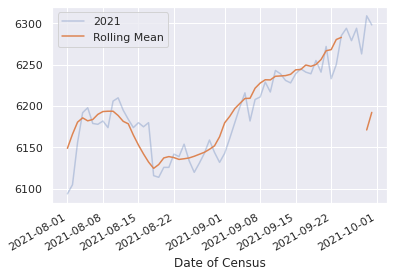

In [22]:
#Rolling over July to November
#Change period you wanted to investigate further in above function 
ax = ax1.plot(alpha=0.30)
ax1.rolling(5).mean().plot(ax=ax)
ax.legend(["2021","Rolling Mean"])

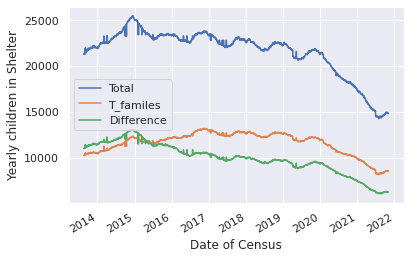

In [23]:
#An overview of what is happening
new_table.plot()
plt.ylabel('Yearly children in Shelter');

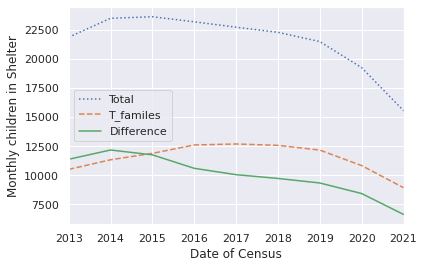

In [24]:
#QS stands for Quarter Start
#MS Month Start
#BA stands for Business year end
# Q	Quarter end

#Resampling and checking the change in the graph
Monthly = new_table.resample('BA').mean()
Monthly.plot(style=[':', '--', '-'])
plt.ylabel('Monthly children in Shelter');

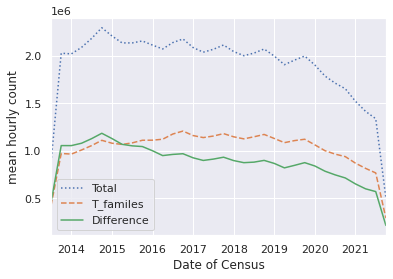

In [27]:
#Rooling data
daily = new_table.resample('Q').sum()
daily.rolling(1, center=True).sum().plot(style=[':', '--', '-'])
plt.ylabel('mean hourly count');

In [28]:
#More details in data
#requesting data by date1:date2
def data_time_base(given_date,col=DHS_Daily_Report.columns,data=DHS_Daily_Report):
  if given_date.find(":")!=-1:
    arrange_date=given_date.split(":")
    if date_exist(arrange_date[0]) and date_exist(arrange_date[1]):
      return data.loc[arrange_date[0]:arrange_date[1]][col]
  
  elif given_date in data.index:
    return data.loc[given_date][col]
  else:
    return 'Wrong date or not exist in data'

In [29]:
#Check if the date exist in data
def date_exist(given_date,data=DHS_Daily_Report.index):
  if given_date in data:
    return True
  else:
    return False

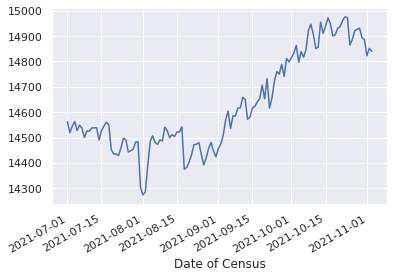

In [30]:
#Picking up some specific period within the dataset
reques_date=data_time_base('2021-7:2021-11','Total Children in Shelter')
reques_date.plot()
plt.show()

* Roughly speaking, in the year 2020, from July to november, we see a decreasing in number of children in shelters. In contrast, in other years, 2013 up to 2019 including the year 2021, we see the same pattern which is increasing in the numbers the children entering the shelters.  

In [31]:
reques_date=data_time_base('2021-07: 2021-11','Total Children in Shelter')

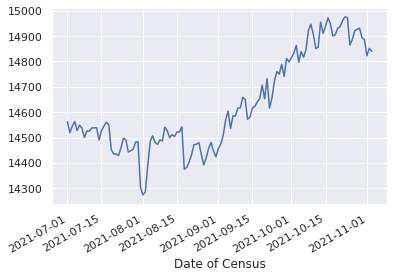

In [32]:
reques_date.plot()
plt.show()

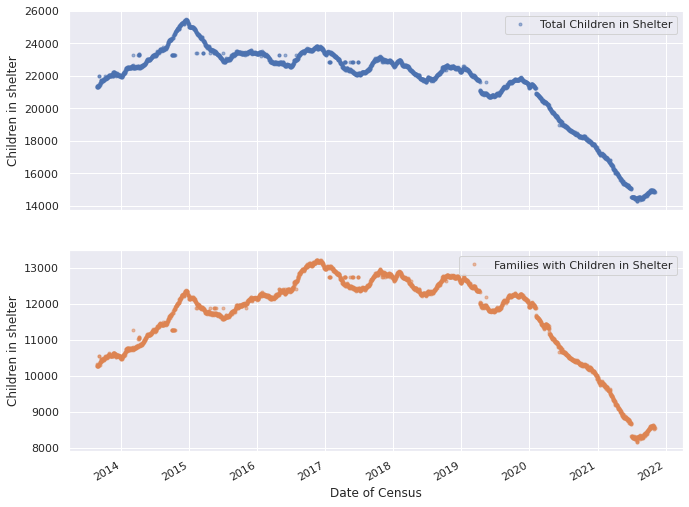

In [33]:
cols_plot =Childrens
axes=DHS_Daily_Report[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
# axes = data_time_base('2020-01:2020-02',cols_plot).plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Children in shelter')

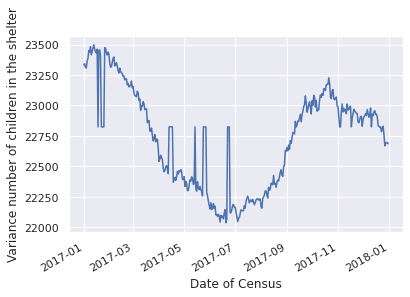

In [34]:
# Some visualization
ax=data_time_base('2017','Total Children in Shelter').plot()
ax.set_ylabel('Variance number of children in the shelter');

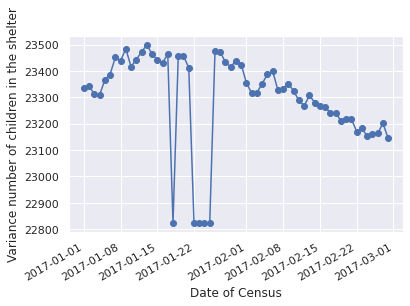

In [35]:
ax =data_time_base('2017-01:2017-02','Total Children in Shelter').plot(marker='o', linestyle='-')
ax.set_ylabel('Variance number of children in the shelter');